
# <p style="text-align: center;">MIS 382N: ADVANCED PREDICTIVE MODELING - MSBA</p>
# <p style="text-align: center;">Assignment 2</p>
## <p style="text-align: center;">Total points: 80 </p>
## <p style="text-align: center;">Due: September 30, submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Your partner needs to be from the same section. Only one student per team needs to submit the assignment on Canvas.  But be sure to include name and UTEID for both students.  Homework groups will be created and managed through Canvas, so please do not arbitrarily change your homework group. If you do change, let the TA know. 

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

### Name(s)
1. Justin Wagers - jww3243
2. Brett Nesfeder - bmn644


# Question 1 (Understanding ElasticNet, 30 points)
Although lots of past studies have been conducted on factors affecting life expectancy using demographic variables, income composition and mortality rates, it was found that the effect of immunization and human development index was not taken into account. Hence, this motivates us to resolve this factor by formulating a regression model based on mixed effects model and multiple linear regression while considering data from 2014 for all countries. Here, important immunization like Hepatitis B, Polio and Diphtheria will also be considered. 

This dataset was taken from https://www.kaggle.com/kumarajarshi/life-expectancy-who.

**Please use Python 3.6+ for this assignment.**

First, we import packages and clean up the obtained dataset. We consider the `Life Expectancy` variable as the dependant variable whereas others are assumed to be independent variables.

In [293]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [294]:
df = pd.read_csv(r"C:\Users\justi\OneDrive\Documents\life.csv", index_col=0)
print(df.shape)

df = df.loc[df['Year']==2014, :]
df = df.drop('Year', axis=1)
df = pd.get_dummies(df, columns=['Status'])
df = df.dropna()
print(df.shape)

(2938, 21)
(131, 21)


In [263]:
df.head()


,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,...,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Status_Developed,Status_Developing
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,...,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,0,1
Albania,77.5,8.0,0,4.51,428.749067,98.0,0,57.2,1,98.0,...,98.0,0.1,4575.763787,288914.0,1.2,1.3,0.761,14.2,0,1
Algeria,75.4,11.0,21,0.01,54.237318,95.0,0,58.4,24,95.0,...,95.0,0.1,547.851700,39113313.0,6.0,5.8,0.741,14.4,0,1
Angola,51.7,348.0,67,8.33,23.965612,64.0,11699,22.7,101,68.0,...,64.0,2.0,479.312240,2692466.0,8.5,8.3,0.527,11.4,0,1
Argentina,76.2,118.0,8,7.93,847.371746,94.0,1,62.2,9,92.0,...,94.0,0.1,12245.256450,42981515.0,1.0,0.9,0.825,17.3,0,1


In [296]:
# Creating training and testing dataset
y = df.iloc[:, 0]
X = df.iloc[:, 1:]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 42)

## Question 1.1 (5 points) 
Run Linear regression on the train dataset and print the $R^2$ values measured on (a) the training dataset and (b) the test dataset.

## Answer 1.1

In [297]:
from sklearn.metrics import r2_score

reg = LinearRegression()
model = reg.fit(X_train, y_train)
predictions = model.predict(X_train)

print('R^2 score (train):', r2_score(y_train, predictions))

testpredictions = model.predict(X_test)
print('R^2 score (test):', r2_score(y_test, testpredictions))

R^2 score (train): 0.8869822224758938
R^2 score (test): 0.8355055233744485


## Question 1.2 (8 points) 
Run linear regression using Lasso and determine the value of $\alpha$ that results in best test set performance. Consider `alphas=10**np.linspace(1,-2,100)*0.5`. Display the best value of $\alpha$ as well as the corresponsing $R^2$ score on test set. Use the following parameters in Lasso model. Finally, store the best model separately. Also, use the co-efficients obtained and select the [columns with non-zero weights](https://stackoverflow.com/questions/62323713/selecting-columns-of-dataframe-where-lasso-coefficient-is-nonzero) and use them to create `X_train_lasso` and `X_test_lasso`. Show how many non-zero columns are present.

    copy_X=True
    normalize=True # Normalizes data using StandardScaler()
    random_state=42

## Answer 1.2

In [298]:
from sklearn.linear_model import LassoCV
from sklearn import linear_model
from sklearn import preprocessing

Xtr_scaled = preprocessing.scale(X_train)
Xte_scaled = preprocessing.scale(X_test)

reg = LassoCV(alphas=10**np.linspace(1,-2,100)*0.5, copy_X = True, normalize=True, random_state = 42).fit(Xtr_scaled, y_train)
print('optimal alpha:', reg.alpha_)

Lassoreg = linear_model.Lasso(alpha=reg.alpha_)
Lassoreg.fit(Xtr_scaled, y_train)

Lassopredictions = Lassoreg.predict(Xte_scaled)
print('R^2 score (test):', r2_score(y_test, testpredictions))
print('Lasso coefficients:', Lassoreg.coef_)

optimal alpha: 0.046630167344161
R^2 score (test): 0.8355055233744485
Lasso coefficients: [-1.99732909e+00 -0.00000000e+00  7.91749913e-02 -2.44100197e-02
  2.16165170e-01 -0.00000000e+00  8.81315252e-02 -5.59286092e-01
 -2.01937404e-01  7.00054442e-01  2.27136390e-01 -1.51254676e+00
 -4.29377767e-02  5.20726755e-01 -0.00000000e+00 -1.81308314e-01
  4.89636229e+00 -0.00000000e+00  3.18188494e-01 -8.54017711e-18]


In [299]:
colnames = []
zero_columns = [1,5,14,17]
for i in zero_columns:
    colnames.append(X_train.columns[i])

In [302]:
X_train_lasso = X_train.copy()
X_test_lasso = X_test.copy()

X_train_lasso.drop(colnames, axis=1, inplace = True)
X_test_lasso.drop(colnames, axis=1, inplace = True)

print(len(X_train_lasso.columns))
print(len(X_test_lasso.columns))

#4 predictors are dropped

16
16


## Question 1.3 (6 points) 
Run linear regression using Ridge and determine the value of $\alpha$ that results in best test set performance. Consider `alphas=10**np.linspace(1,-2,100)*0.5`. Display the best value of $\alpha$ as well as the corresponsing $R^2$ score on test set. Use the following parameters in Lasso model.

    copy_X=True
    normalize=True # Normalizes data using StandardScaler()
    random_state=42

## Answer 1.3

In [303]:
from sklearn.linear_model import RidgeCV

reg = RidgeCV(alphas=10**np.linspace(1,-2,100)*0.5 ,normalize=True).fit(Xtr_scaled, y_train)
print('optimal alpha:', reg.alpha_)

Ridgereg = linear_model.Ridge(alpha=reg.alpha_)
Ridgereg.fit(Xtr_scaled, y_train)

Ridgepredictions = Ridgereg.predict(Xte_scaled)
print('R^2 score (test):', r2_score(y_test, testpredictions))
print('Ridge coefficients:', Ridgereg.coef_)

optimal alpha: 0.0936908711430192
R^2 score (test): 0.8355055233744485
Ridge coefficients: [-1.96864337  5.52378854  0.14686099 -0.17643731  0.42717398 -0.36202933
  0.04319035 -5.74393808 -0.4117741   0.80080424  0.19754778 -1.51710125
 -0.02358679  0.41784322 -0.63553011  0.26083932  5.10429427 -0.27153115
  0.19746026 -0.19746026]


## Question 1.4  (8 points) 
Run [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) [(Video Reference)](https://youtu.be/1dKRdX9bfIo) on the `X_train_lasso` dataset by using all possible values from the below mentioned parameter set:

    l1_ratios = np.arange(0, 1.01, 0.01)  # 101 elements
    alphas = 10**np.linspace(1, -2, 100)*0.5 # 100 elements
    normalize = True
    random_state = 42


Store the $R^2$ score obtained from `X_test_lasso` set for each combination in an array with 101 rows and 100 columns. e.g.

    arr[i][j] = curr_r2_score # obtained using l1_ratios[i] and alphas[j]

where `i` is the `ith` element from `l1_ratio` and `j` is the `jth` element from `alphas`. Print the best $R^2$ score obtained using test set and its corresponding `alpha` and `l1 ratio`.

In [304]:
 arr = np.zeros((101, 100)) # Create 101x100 array

Note that by varying the `l1_ratio`, you are controlling the ratio of Lasso and Ridge regularization that is present in the model. When `l1_ratio = 1`, it means that the model uses Lasso regularization only whereas when `l1_ratio = 0`, it means that the model uses Ridge regularization only. You can find the formula for the loss function [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html).

## Answer 1.4

In [305]:
from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_regression

l1_ratios = np.arange(0, 1.01, 0.01)
alphas = 10**np.linspace(1, -2, 100)*0.5

In [306]:
l1_ratios = l1_ratios.tolist()
alphas = alphas.tolist()

#Turning into lists for easier indexing later on

In [307]:
X_train_lasso = preprocessing.scale(X_train_lasso)
X_test_lasso = preprocessing.scale(X_test_lasso)

for i in l1_ratios:
    for j in alphas:
        regr = ElasticNet(l1_ratio= i, alpha = j,random_state=42, normalize = True)
        regr.fit(X_train_lasso, y_train)
        Elasticpredictions = regr.predict(X_test_lasso)
        current_r2_score = r2_score(y_test, Elasticpredictions)
        arr[l1_ratios.index(i)][alphas.index(j)] = current_r2_score
print(arr)


[[-0.09435841 -0.09315365 -0.09186477 ...  0.70958754  0.70983592
   0.70996136]
 [-0.09624082 -0.09502236 -0.09371884 ...  0.70963689  0.70986879
   0.70997959]
 [-0.09814656 -0.09691292 -0.09559319 ...  0.70968505  0.70990054
   0.70999681]
 ...
 [-0.11130508 -0.11130508 -0.11130508 ...  0.70678414  0.70527914
   0.70381266]
 [-0.11130508 -0.11130508 -0.11130508 ...  0.7062058   0.70467577
   0.70320913]
 [-0.11130508 -0.11130508 -0.11130508 ...  0.70552562  0.70408915
   0.70262336]]


## Question 1.5 (3 points) 
Call `plot_heatmap()` using the 101x100 array from the previous question. What does this heatmap represent? Interpret the heatmap.

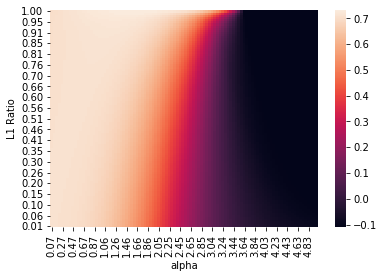

In [308]:
arr = np.fliplr(arr)
def rescale(val, in_min, in_max, out_min, out_max):
    return out_min + (val - in_min) * ((out_max - out_min) / (in_max - in_min))

def format_y(value, tick_number):
    return f'{value/100.:0.2f}'

def format_x(value, tick_number):
    return f'{rescale(value, 0., 100., 0.05, 5.):0.2f}'

def plot_heatmap(arr):
    ax = sns.heatmap(arr)
    ax.set_ylabel("L1 Ratio")
    ax.set_xlabel("alpha")
    ax.invert_yaxis()
    ax.xaxis.set_major_formatter(plt.FuncFormatter(format_x))
    ax.yaxis.set_major_formatter(plt.FuncFormatter(format_y))
plot_heatmap(arr)

## Answer 1.5

The heatmap gradient shows the R-squared values for different values of alpha and the L1 Ratio. From this heat map we can ascertain that our Elastic Net model maximized R-squared with values of alpha below 2.25, while the L1 ratio seems to have less of an effect on R^2. 

# Question 2 (5 points)
Suppose you learn a ridge regression based on some of the independent variables available to you, and including a few interaction terms as well. Your result is disappointing, and you believe that the model is suffering from either too much bias or too much variance. Describe briefly how you will test which alternative is more likely to be true. (there is no extra data that you can use, so “get more data” is not an option).

## Answer 2

To test whether the model is suffering from too much bias or too much variance, we can alter the lambda parameter. If we can increase the lambda term and improve the performance of the model, it is likely the model was suffering from too much variance. However, if increasing lambda worsens the performance of the model, the model may have been suffering from too much bias and we might want to decrease the lambda parameter.

# Question 3 Bias-Variance (20 pts): 

We want to build a model that can predict y for unknown inputs x.(15 pts)

(a) (5 pts) Fit a linear model to the training data, and report mean squared error on the test data. Plot the train and test points on the same plot, clearly denoting the training and testing points. On the same figure, plot the predictions of the linear model using x_all. All the plots must be in the same figure and be clearly labeled.


(b) (10 pts) Fit polynomial models of degrees 2, 3, 4 and 12 to the training data, Report mean squared error (on both train and test sets) for all the models. Plot the data (train and test points) as before.  On the same figure, plot the predictions of the polynomial models using x_all. All the plots must be in the same figure and be clearly labeled.


(c) (5 pts) Which model performed the best? Explain.


* Use the below code to load the data from the file 'ps01.data'. It is organized as a dictionary, of train and test data.

In [309]:
from sklearn import linear_model as lm
from sklearn.metrics import mean_squared_error,mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

x_all = np.linspace(-2,5,101).reshape(-1,1)
all_files = np.load(r"C:\Users\justi\OneDrive\Documents\q3_data.npz")
x_train, y_train, x_test, y_test = all_files['arr_0'], all_files['arr_1'], all_files['arr_2'], all_files['arr_3']

### Answer

#### (a)

In [310]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

reg = LinearRegression()
model = reg.fit(x_train, y_train)
testpredictions = model.predict(x_test)

print('MSE (test):', mean_squared_error(y_test, testpredictions))

MSE (test): 4.739110717634691


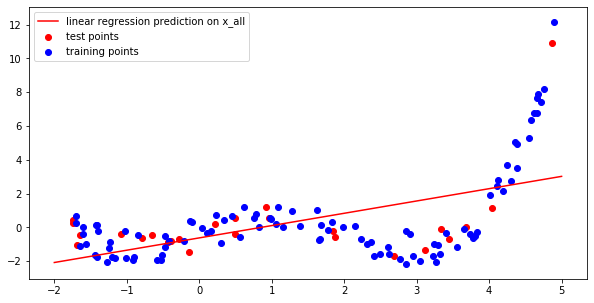

In [311]:
import matplotlib.pyplot as plt

y_pred = model.predict(x_all)

plt.figure(figsize=(10,5))
plt.scatter(x_test,y_test,s=15)
plt.plot(x_all,y_pred,color='r', label = 'linear regression prediction on x_all')

plt.scatter(x_test,y_test,color=['red'], label = 'test points')
plt.scatter(x_train,y_train, color =['blue'], label = 'training points')
plt.legend(loc='upper left')
plt.show()

### (b)

2nd degree:
MSE (train): 3.241421853814466
MSE (test): 3.118688012803552
3rd degree:
MSE (train): 1.4201223351315244
MSE (test): 1.6698703639509385
4th degree:
MSE (train): 0.3745950147780309
MSE (test): 0.2793974390234883
12th degree:
MSE (train): 0.32974847922680267
MSE (test): 0.40228762093405257


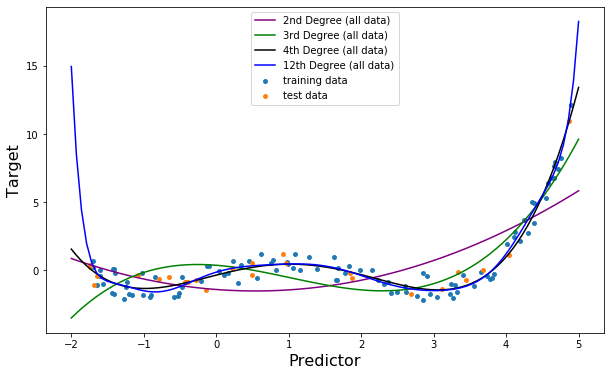

In [312]:
import operator
from sklearn.pipeline import Pipeline

Input=[('polynomial',PolynomialFeatures(degree=2)),('modal',LinearRegression())]
pipe=Pipeline(Input)
pipe.fit(x_train.reshape(-1,1),y_train.reshape(-1,1))
from sklearn.preprocessing import PolynomialFeatures 
poly_pred=pipe.predict(x_all.reshape(-1,1))
sorted_zip = sorted(zip(x_all,poly_pred))
x_poly, poly_pred = zip(*sorted_zip)

# 2nd degree predictions

print('2nd degree:')
train_pred = pipe.predict(x_train.reshape(-1,1))
print('MSE (train):', mean_squared_error(y_train.reshape(-1,1), train_pred))
test_pred = pipe.predict(x_test.reshape(-1,1))
print('MSE (test):', mean_squared_error(y_test.reshape(-1,1), test_pred))

Input3=[('polynomial',PolynomialFeatures(degree=3)),('modal',LinearRegression())]
pipe3=Pipeline(Input3)
pipe3.fit(x_train.reshape(-1,1),y_train.reshape(-1,1))
poly_pred3=pipe3.predict(x_all.reshape(-1,1))
sorted_zip3 = sorted(zip(x_all,poly_pred3))
x_poly3, poly_pred3 = zip(*sorted_zip3)

#3rd degree predictions

print('3rd degree:')
train_pred3 = pipe3.predict(x_train.reshape(-1,1))
print('MSE (train):', mean_squared_error(y_train.reshape(-1,1), train_pred3))
test_pred3 = pipe3.predict(x_test.reshape(-1,1))
print('MSE (test):', mean_squared_error(y_test.reshape(-1,1), test_pred3))

Input4=[('polynomial',PolynomialFeatures(degree=4)),('modal',LinearRegression())]
pipe4=Pipeline(Input4)
pipe4.fit(x_train.reshape(-1,1),y_train.reshape(-1,1))
poly_pred4=pipe4.predict(x_all.reshape(-1,1))
sorted_zip4 = sorted(zip(x_all,poly_pred4))
x_poly4, poly_pred4 = zip(*sorted_zip4)

#4th degree predictions

print('4th degree:')
train_pred4 = pipe4.predict(x_train.reshape(-1,1))
print('MSE (train):', mean_squared_error(y_train.reshape(-1,1), train_pred4))
test_pred4 = pipe4.predict(x_test.reshape(-1,1))
print('MSE (test):', mean_squared_error(y_test.reshape(-1,1), test_pred4))

Input12=[('polynomial',PolynomialFeatures(degree=12)),('modal',LinearRegression())]
pipe12=Pipeline(Input12)
pipe12.fit(x_train.reshape(-1,1),y_train.reshape(-1,1))
poly_pred12=pipe12.predict(x_all.reshape(-1,1))
sorted_zip12 = sorted(zip(x_all,poly_pred12))
x_poly12, poly_pred12 = zip(*sorted_zip12)

#12th degree predictions

print('12th degree:')
train_pred12 = pipe12.predict(x_train.reshape(-1,1))
print('MSE (train):', mean_squared_error(y_train.reshape(-1,1), train_pred12))
test_pred12 = pipe12.predict(x_test.reshape(-1,1))
print('MSE (test):', mean_squared_error(y_test.reshape(-1,1), test_pred12))

#plotting predictions
plt.figure(figsize=(10,6))
plt.scatter(x_train,y_train,s=15, label = 'training data')
plt.scatter(x_test,y_test, s=15, label = 'test data')
plt.plot(x_poly,poly_pred,color='purple',label='2nd Degree (all data)')
plt.plot(x_poly3,poly_pred3,color='g',label='3rd Degree (all data)')
plt.plot(x_poly4,poly_pred4,color='black',label='4th Degree (all data)')
plt.plot(x_poly12,poly_pred12,color='b',label='12th Degree (all data)')
plt.xlabel('Predictor',fontsize=16)
plt.ylabel('Target',fontsize=16)
plt.legend()
plt.show()


### (c)

Although the 12th degree polynomial had the lowest MSE on the training data (0.3297), the 4th degree polynomial had a lower MSE when predicting on test data (0.27939). Increasing the degree of the polynomial helped fit the data better, but only up to a point; increasing the degree too far leads to overfitting. 

# Question 4 - Stochastic Gradient Descent (25 pts)

1. (5pts) Using stochastic gradient descent, derive the coefficent updates for all 4 coefficients of the model: $$ y = w_0 + w_1x_1 + w_2x_1x_2 + w_3e^{-x_1} $$ Hint: start from the cost function (Assume sum of squared error). If you write the math by hand, include the image in your notebook and upload the image in the submission.


2. (20pts) Write Python code for an SGD solution to the non-linear model$$ y = w_0 + w_1x_1 + w_2x_1x_2 + w_3e^{-x_1} $$  Try to format similarly to scikit-learn's models. The template of the class is given. The init function of the class takes as input the learning_rate, regularization_constant and number of epochs. The fit method must take as input X,y. The _predict_ method takes an X value (optionally, an array of values). Use your new gradient descent regression to predict the data given in 'samples.csv', for 15 epochs, using learning rates: [0, .0001, .001, .01, 0.1, 1, 10, 100] and regularization (ridge regression) constants: [0,10,100] . Plot MSE and the $w$ parameters as a function of epoch (for 15 epochs) for the best 2 combinations of learning_rate and regularization for SGD. (2pts) Report the MSE at the end of 15 epochs for the two best combinations.


In [316]:
%matplotlib inline
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

class Regression:
    
    def __init__(self, learning_rate, regularization, n_epoch):
        self.learning_rate = learning_rate
        self.n_epoch = n_epoch
        self.regularization = regularization
        self.coef = np.zeros(5) 
        
    def sgd(self, gradient):
        self.coef 
        self.coef = self.coef + (self.learning_rate*gradient - self.learning_rate*self.regularization*self.coef)
        # = please fill this to update self.coef using SGD
    
        
    def fit(self, X, y, plot = False):
        self.mse = []
        self.coefs = []
        self.cache = np.zeros(self.coef.shape)
        self.v = np.zeros(self.coef.shape)
        self.decay_rate = 0.9
        attrib = self.get_features(X)
        for epoch in range(self.n_epoch):
            for i in range(X.shape[0]):
                prediction = self.linearPredict(attrib[i])
                loss = y[i] - prediction
                gradient = loss*attrib[i]
                self.gradient = gradient
                self.sgd(gradient)
                if(i == len(X) -1):
                    self.coefs.append(self.coef)
                    residuals = y - self.linearPredict(attrib)         
                    self.mse.append(np.mean(residuals**2))

        self.lowest_mse = self.mse[-1]
        if plot == True:
            plt.figure()
            plt.plot(range(self.n_epoch),self.mse)
            plt.xlabel('epoch')
            plt.ylabel('MSE')
            plt.figure()
            coefs = np.array(self.coefs)
            plt.plot(range(self.n_epoch),coefs[:,0],label='w0')
            plt.plot(range(self.n_epoch),coefs[:,1],label='w1')
            plt.plot(range(self.n_epoch),coefs[:,2],label='w2')
            plt.plot(range(self.n_epoch),coefs[:,3],label='w3')
            plt.legend()
            plt.xlabel('epoch')
            plt.ylabel('parameter value')

    def get_features(self, X):
        '''
        this output of this function can be used to compute the gradient in `fit`
        '''
        x = np.zeros((X.shape[0], 5))
        x[:,0] = 1
        x[:,1] = X[:,0]
        x[:,2] = X[:,0]*X[:,1]
        x[:,3] = (X[:,0]**2) * (X[:,1])
        x[:,4] = np.exp(-X[:,0])
        
        return x
        
    def linearPredict(self, X_features):
        prediction = np.dot(X_features, self.coef)
        return prediction

In [317]:
data = pd.read_csv(r"C:\Users\justi\OneDrive\Documents\q4_samples.csv")
X = np.array([data['x1'].values, data['x2'].values]).T
y = data['y'].values
n_epochs = 15
learning_rate = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
regularization = [0, 10, 100]

## Answer 

### 1.

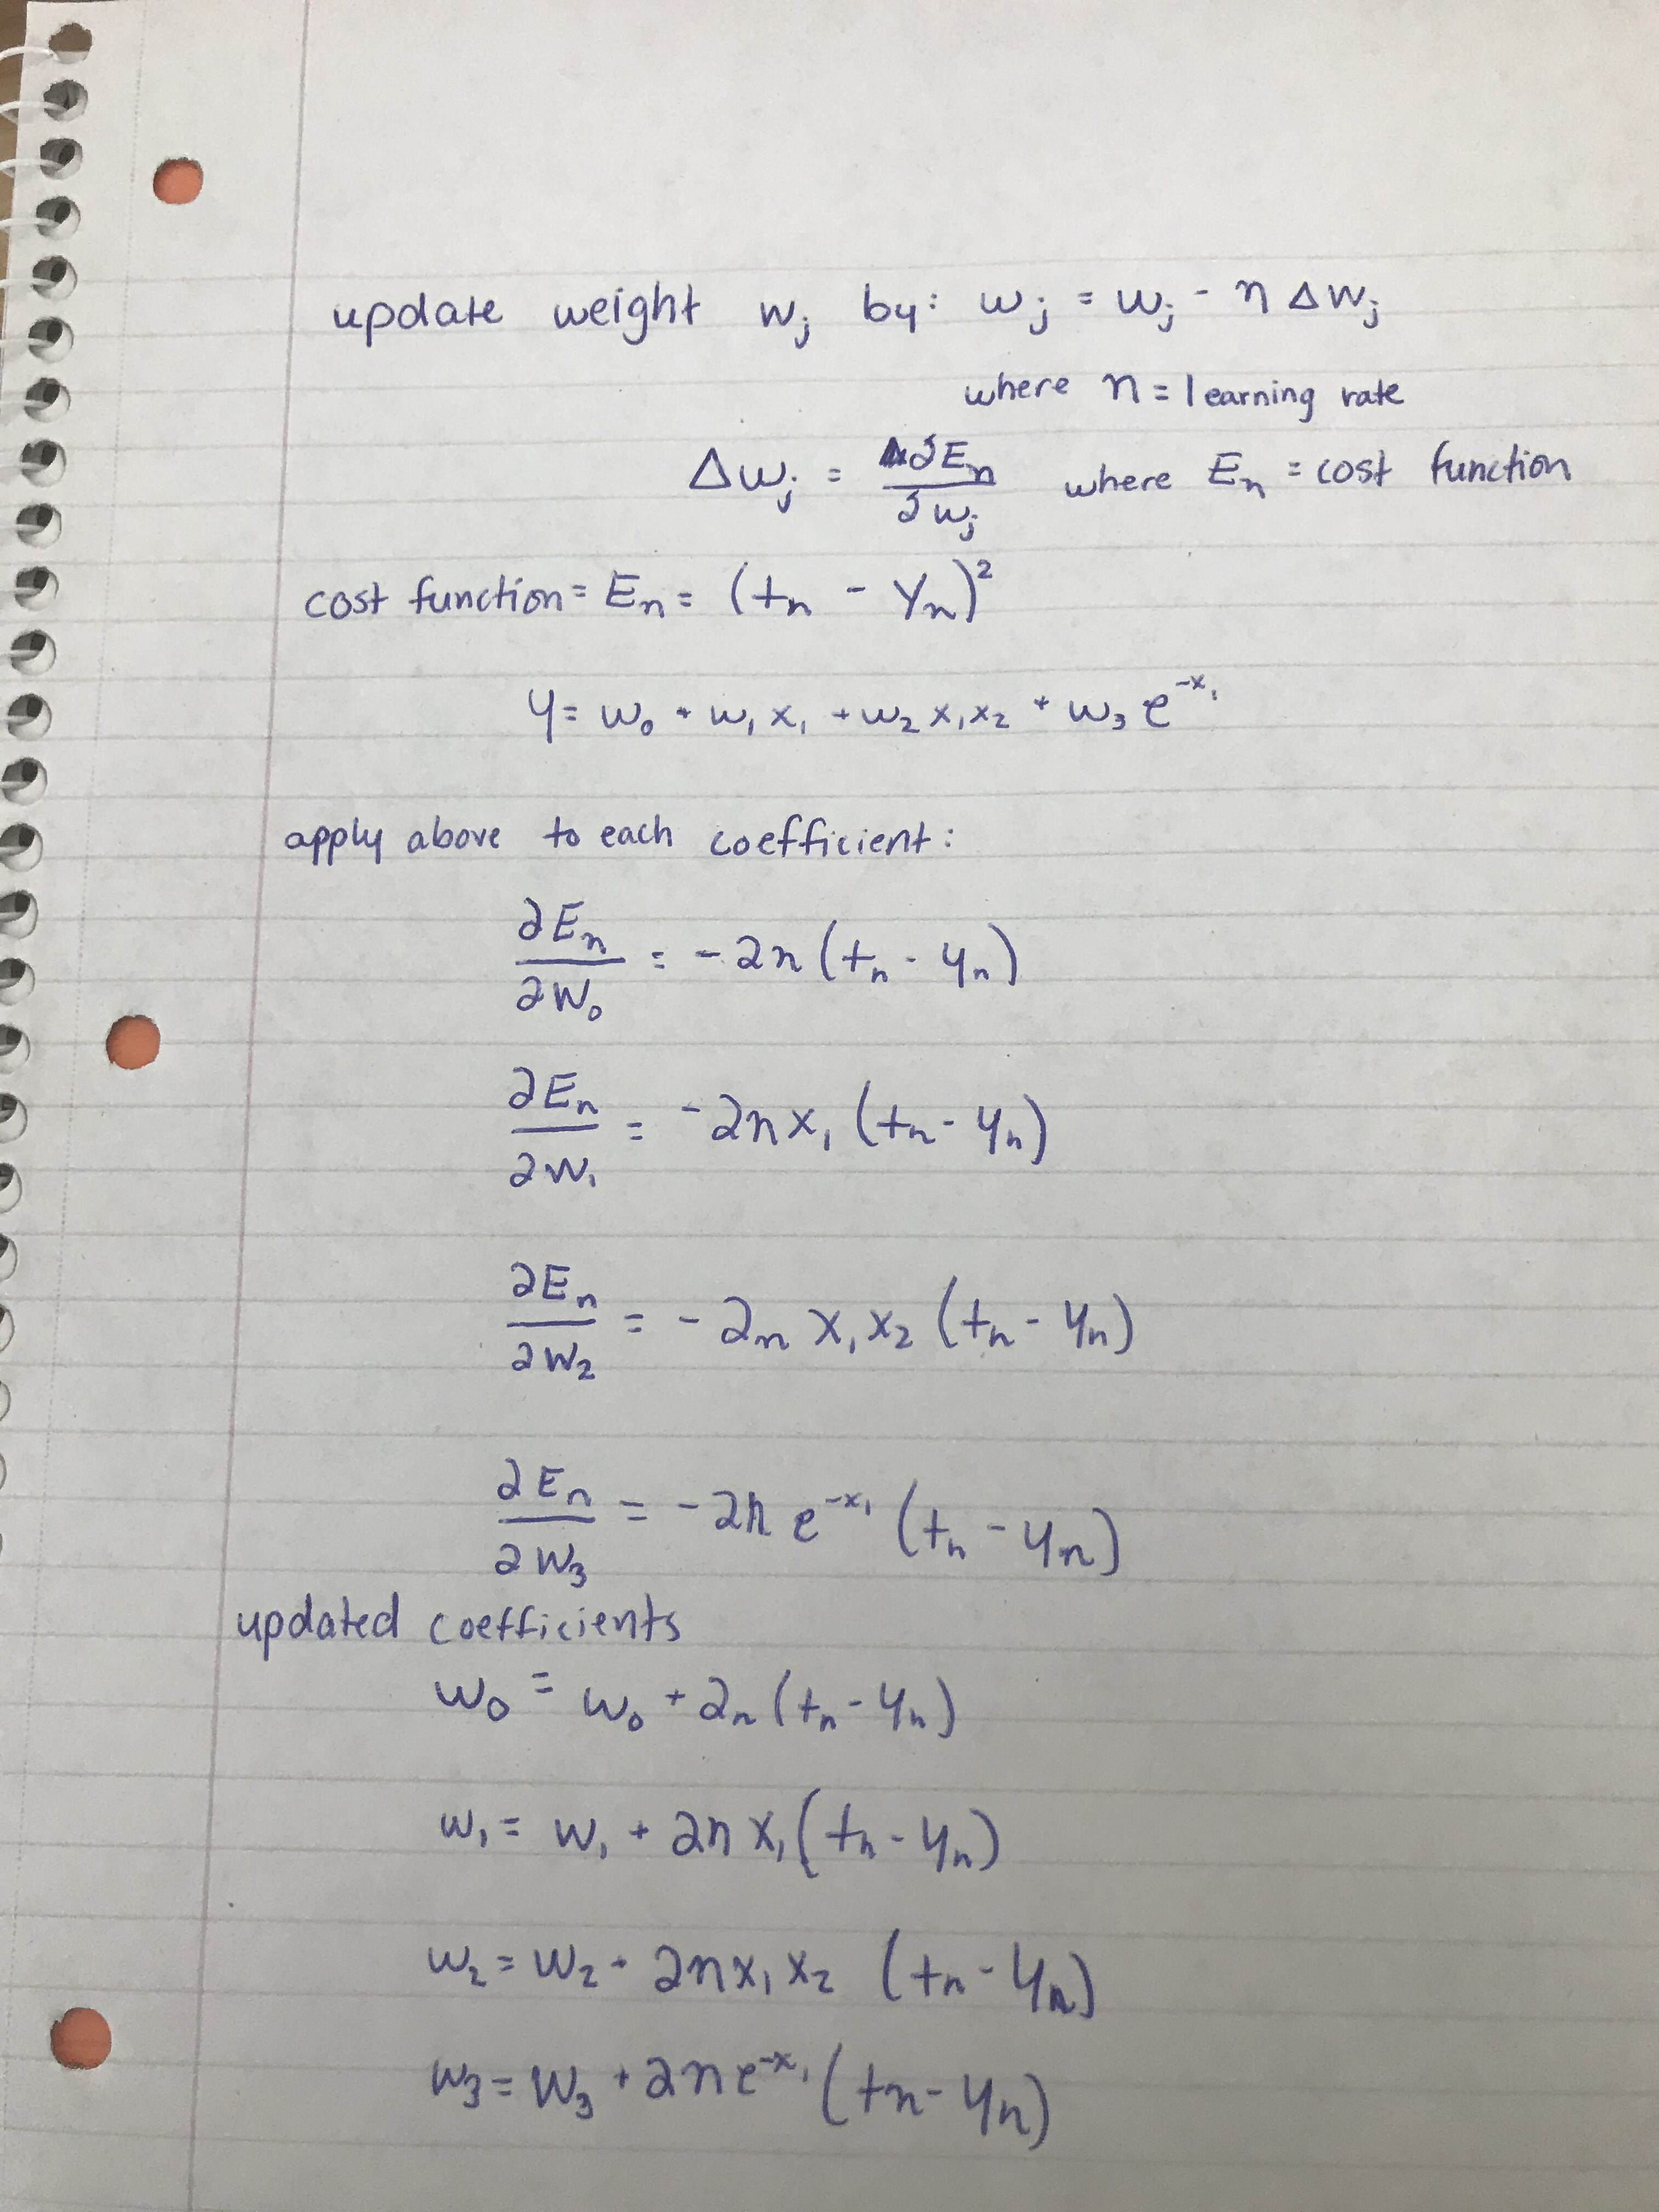

In [314]:
from IPython.display import Image
Image(r"C:\Users\justi\OneDrive\Documents\apm hw  2.jpg")

### 2.



In [318]:
#Creating array of learning rate, regularization, and mse for each combination
final = []
for l in learning_rate:
    for r in regularization:
        sgd = Regression(learning_rate= l, regularization= r, n_epoch= n_epochs)
        results = sgd.fit(X, y)
        min_mse = sgd.mse.index(min(sgd.mse))
        mse = sgd.mse[min_mse]
        final.append((l, r, mse))
final



[(0.0001, 0, 0.03702171519513076),
 (0.0001, 10, 0.05593630352877323),
 (0.0001, 100, 0.06359794995865936),
 (0.001, 0, 0.030477122898693438),
 (0.001, 10, 0.05585132650580208),
 (0.001, 100, 0.06345790369238681),
 (0.01, 0, 0.02690862250621438),
 (0.01, 10, 0.0544290058090716),
 (0.01, 100, 0.0634322971664447),
 (0.1, 0, 0.02932221797324859),
 (0.1, 10, 0.05522445171911261),
 (0.1, 100, nan),
 (1, 0, 5.4868187585477185e+48),
 (1, 10, nan),
 (1, 100, nan),
 (10, 0, nan),
 (10, 10, nan),
 (10, 100, nan),
 (100, 0, nan),
 (100, 10, nan),
 (100, 100, nan)]

In [319]:
final = pd.DataFrame(final, columns = ['learning_rate','regularization','mse'])

final.sort_values('mse')

#MSE, learning rate, regularization for best 2 combinations

print('Best combination:')
print('MSE:', final.mse[6])
print('learning_rate:', final.learning_rate[6])
print('regularization:', final.regularization[6])

print('Second best combination:')
print('MSE:', final.mse[9])
print('learning_rate:', final.learning_rate[9])
print('regularization:', final.regularization[9])

Best combination:
MSE: 0.02690862250621438
learning_rate: 0.01
regularization: 0
Second best combination:
MSE: 0.02932221797324859
learning_rate: 0.1
regularization: 0


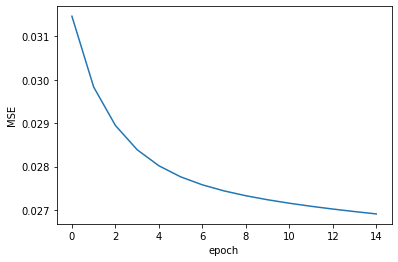

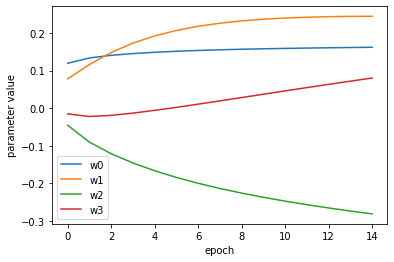

In [320]:
#Plots for top pair of learning rate, regularization
reg = Regression(learning_rate=0.01, regularization= 0, n_epoch= n_epochs)
results = reg.fit(X, y, plot=True)

 

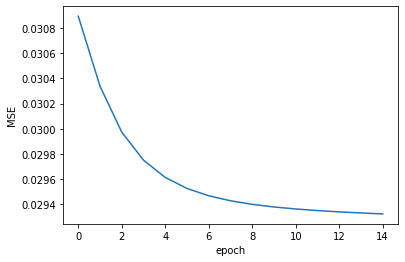

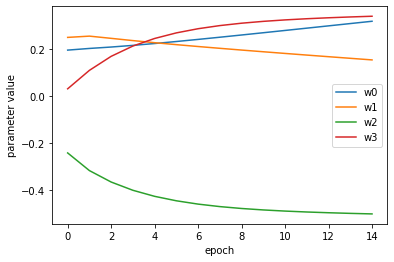

In [321]:
#Plots for 2nd best pair of learning rate, regularization

reg = Regression(learning_rate=0.1, regularization= 0, n_epoch= n_epochs)
results = reg.fit(X, y, plot=True)